1. The Physics Behind k_eff

First, let's establish the key physical parameters that influence the effective neutron multiplication factor, $k_{eff}$, in a simple reactor core. $k_{eff}$ represents the ratio of neutrons in one generation to the next.

$k_{eff}$ > 1: The reactor is supercritical, and the chain reaction is growing (power level increasing).

$k_{eff}$ = 1: The reactor is critical, and the chain reaction is self-sustaining (stable power level).

$k_{eff}$ < 1: The reactor is subcritical, and the chain reaction is dying out (power level decreasing).

Our model will consider four key design parameters:

Uranium Enrichment (% U-235): This is the percentage of the fissile isotope U-235 in the uranium fuel. Higher enrichment leads to a higher probability of fission, which is the primary driver for increasing $k_{eff}$.

Fuel Pin Radius (cm): The radius of the cylindrical uranium fuel pellet. A larger radius means more fuel, but it also affects how easily neutrons can escape to the moderator.

Cladding Thickness (cm): A thin metal layer (usually a zirconium alloy) that surrounds the fuel to contain fission products. Cladding absorbs some neutrons, which slightly decreases $k_{eff}$.

Lattice Pitch (cm): The center-to-center distance between fuel pins. This parameter is crucial as it determines the amount of moderator (like water) between the fuel pins. The moderator's job is to slow down neutrons to energies where they are more likely to cause fission, a critical factor in the neutron lifecycle.

2. Setup and Parameter Definition

We'll start by importing the necessary libraries and defining the realistic physical bounds for our simulation parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of simulations to run
N_SAMPLES = 5000

# We set realistic physical bounds for our reactor design parameters.
param_ranges = {
    'enrichment_pct': (1.0, 5.0),       # U-235 enrichment from 1% to 5%
    'fuel_radius_cm': (0.35, 0.50),     # Fuel pin radius in cm
    'cladding_thickness_cm': (0.05, 0.08), # Cladding thickness in cm
    'lattice_pitch_cm': (1.1, 1.6)     # Distance between fuel pins in cm
}

print("Libraries imported and parameters defined.")

Libraries imported and parameters defined.


3. The "Mock" Physics Simulator

This function calculates a realistic $k_{eff}$ value based on a simplified, non-linear physics formula. It includes randomness to mimic the stochastic nature of Monte Carlo simulations.

In [2]:
def simulate_keff(params):
    """Calculates k_eff based on a simplified physics model with added noise."""
    enr = params['enrichment_pct']
    r = params['fuel_radius_cm']
    c = params['cladding_thickness_cm']
    p = params['lattice_pitch_cm']

    # Enrichment is the strongest positive driver
    term_enrichment = 0.9 + 0.1 * enr

    # Moderator-to-fuel ratio effect (complex interaction)
    moderator_fraction = (p**2 - np.pi * (r + c)**2) / (p**2)
    term_moderation = 0.5 * np.sin((moderator_fraction - 0.5) * np.pi)

    # Cladding absorbs neutrons, a negative effect
    term_absorption = -0.2 * c / r

    # Combine terms to get the ideal k_eff
    keff_ideal = term_enrichment + term_moderation + term_absorption

    # Add random noise to simulate Monte Carlo stochastic uncertainty
    noise = np.random.normal(loc=0.0, scale=0.005)

    return keff_ideal + noise

print("Simulator function `simulate_keff` created.")

Simulator function `simulate_keff` created.


4. Generate the Dataset

Now, we'll run the parameter sweep. We generate N_SAMPLES random designs and use our simulator to calculate $k_{eff}$ for each one.

In [3]:
print(f"Generating {N_SAMPLES} reactor simulation data points...")

# Create random values for each parameter within its defined range
sim_params = {name: np.random.uniform(low, high, N_SAMPLES)
              for name, (low, high) in param_ranges.items()}

# A list to store the results of each simulation
results = []

# Loop through all the generated parameter sets and simulate k_eff
for i in range(N_SAMPLES):
    params = {name: values[i] for name, values in sim_params.items()}
    keff = simulate_keff(params)
    results.append({
        'enrichment_pct': params['enrichment_pct'],
        'fuel_radius_cm': params['fuel_radius_cm'],
        'cladding_thickness_cm': params['cladding_thickness_cm'],
        'lattice_pitch_cm': params['lattice_pitch_cm'],
        'keff': keff
    })

# Convert the results to a pandas DataFrame for easy handling
df = pd.DataFrame(results)

print("Dataset generation complete.")

Generating 5000 reactor simulation data points...
Dataset generation complete.


5. Save and Inspect the Data

With the data generated, we'll save it to a CSV file for use in later notebooks and print the first few rows to verify its structure.

In [4]:
# Save the dataset to a CSV file
df.to_csv('reactor_simulations.csv', index=False)

print("Data saved to 'reactor_simulations.csv'.")
print("\nFirst 5 rows of the dataset:")
print(df.head())

Data saved to 'reactor_simulations.csv'.

First 5 rows of the dataset:
   enrichment_pct  fuel_radius_cm  cladding_thickness_cm  lattice_pitch_cm  \
0        1.516903        0.416304               0.057409          1.229477   
1        3.908473        0.441084               0.063907          1.574059   
2        2.365705        0.405615               0.067748          1.483300   
3        3.765332        0.352726               0.052737          1.540811   
4        4.023074        0.466664               0.071664          1.144257   

       keff  
0  1.076005  
1  1.516903  
2  1.381289  
3  1.641655  
4  0.985519  


6. Initial Visualization

Finally, a quick pairplot helps us visualize the relationships between each input parameter and the output $k_{eff}$. This is a preliminary step for the more detailed EDA in the next notebook.




Generating pairplot to show relationships...


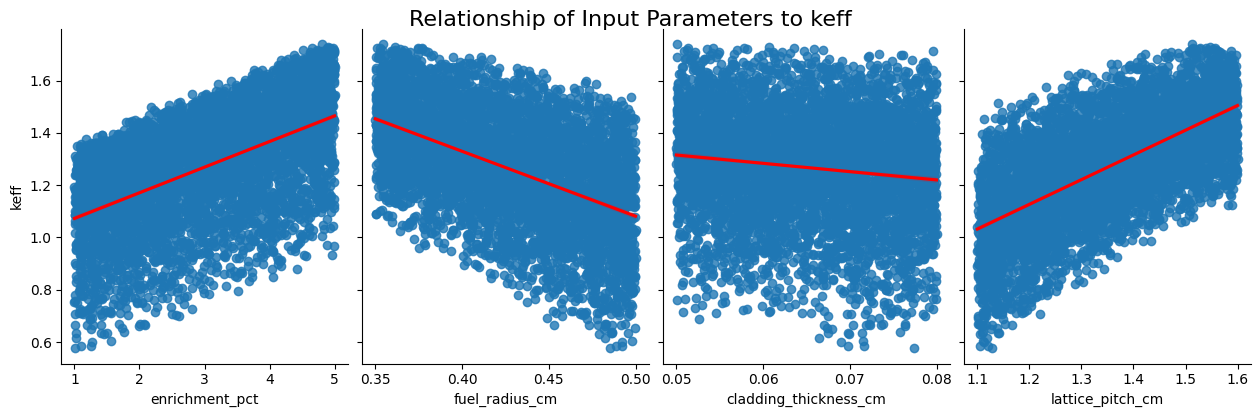

In [5]:
print("\nGenerating pairplot to show relationships...")

# This plot shows how keff (y-axis) changes with each input parameter (x-axes)
sns.pairplot(df,
             x_vars=['enrichment_pct', 'fuel_radius_cm', 'cladding_thickness_cm', 'lattice_pitch_cm'],
             y_vars=['keff'],
             height=4, aspect=0.8, kind='reg',
             plot_kws={'line_kws':{'color':'red'}}) # Add styling to the regression line

plt.suptitle('Relationship of Input Parameters to keff', y=1.02, fontsize=16)
plt.show()